In [1]:
from sklearn import datasets

d=datasets.load_iris() # iris 데이터셋을 읽고
print(d.DESCR) # 내용을 출력
for i in range(0,len(d.data)): # 샘플을 순서대로 출력
    print(i+1,d.data[i],d.target[i])
from sklearn import svm

s=svm.SVC(gamma=0.1,C=10) # svm 분류 모델 SVC 객체 생성하고
s.fit(d.data,d.target) # iris 데이터로 학습

new_d=[[6.4,3.2,6.0,2.5],[7.1,3.1,4.7,1.35]] # 101번째와 51번째 샘플을 변형하여 새로운 데이터 생성
res=s.predict(new_d)
print("새로운 2개 샘플의 부류는", res)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [9]:
import plotly.express as px

df = px.data.iris()
fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width', color='species') # petal_length를 제외하여 3차원 공간 구성
fig.show()

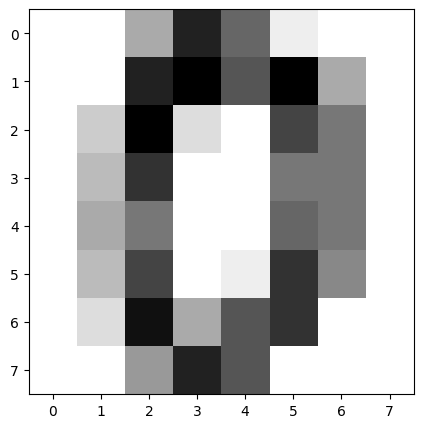

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
이 숫자는  0 입니다.


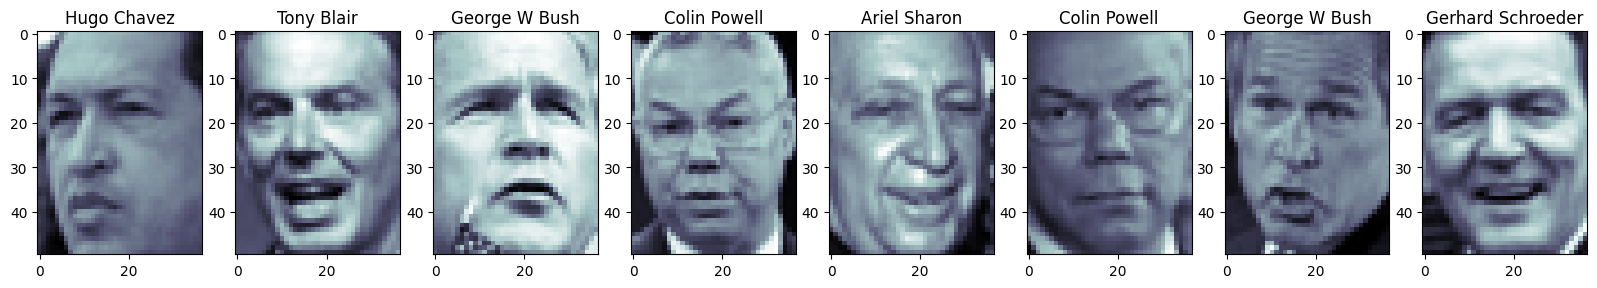

*****
 From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----




 
*****
이 문서의 부류는 < rec.autos > 입니다.


In [5]:
from sklearn import datasets
import matplotlib.pyplot as plt

digit=datasets.load_digits()

plt.figure(figsize=(5,5))
plt.imshow(digit.images[0],cmap=plt.cm.gray_r,interpolation='nearest') # 0번 샘플을 그림
plt.show()
print(digit.data[0]) # 0번 샘플의 화솟값을 출력
print("이 숫자는 ",digit.target[0],"입니다.")
lfw=datasets.fetch_lfw_people(min_faces_per_person=70,resize=0.4) # 데이터셋 읽기

plt.figure(figsize=(20,5))

for i in range(8): # 처음 8명을 디스플레이
    plt.subplot(1,8,i+1)
    plt.imshow(lfw.images[i],cmap=plt.cm.bone)
    plt.title(lfw.target_names[lfw.target[i]])

plt.show()
news=datasets.fetch_20newsgroups(subset='train') # 데이터셋 읽기
print("*****\n",news.data[0],"\n*****") # 0번 샘플 출력
print("이 문서의 부류는 <",news.target_names[news.target[0]],"> 입니다.")

In [6]:
from sklearn import datasets
from sklearn import svm

digit=datasets.load_digits()

# svm의 분류기 모델 SC를 학습
s=svm.SVC(gamma=0.1,C=10)
s.fit(digit.data,digit.target) # digit 데이터로 모델링

# 훈련 집합의 앞에 있는 샘플 3개를 새로운 샘플로 간주하고 인식해봄
new_d=[digit.data[0],digit.data[1],digit.data[2]]
res=s.predict(new_d)
print("예측값은", res)
print("참값은", digit.target[0],digit.target[1],digit.target[2])

# 훈련 집합을 테스트 집합으로 간주하여 인식해보고 정확률을 측정
res=s.predict(digit.data)
correct=[i for i in range(len(res)) if res[i]==digit.target[i]]
accuracy=len(correct)/len(res)
print("화소 특징을 사용했을 때 정확률=",accuracy*100, "%")

예측값은 [0 1 2]
참값은 0 1 2
화소 특징을 사용했을 때 정확률= 100.0 %


In [7]:
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np

# 데이터셋을 읽고 훈련 집합과 테스트 집합으로 분할
digit=datasets.load_digits()
x_train,x_test,y_train,y_test=train_test_split(digit.data,digit.target,train_size=0.6)

# svm의 분류 모델 SVC를 학습
s=svm.SVC(gamma=0.001)
s.fit(x_train,y_train)

res=s.predict(x_test)

# 혼동 행렬 구함
conf=np.zeros((10,10))
for i in range(len(res)):
    conf[res[i]][y_test[i]]+=1
print(conf)

# 정확률 측정하고 출력
no_correct=0
for i in range(10):
    no_correct+=conf[i][i]
accuracy=no_correct/len(res)
print("테스트 집합에 대한 정확률은", accuracy*100, "%입니다.")

[[77.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 68.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0. 69.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 74.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0. 75.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 63.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. 66.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0. 75.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  1.  0. 68.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  1. 75.]]
테스트 집합에 대한 정확률은 98.74826147426981 %입니다.


In [8]:
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import cross_val_score
import numpy as np

digit=datasets.load_digits()
s=svm.SVC(gamma=0.001)
accuracies=cross_val_score(s,digit.data,digit.target,cv=5) # 5-겹 교차 검증

print(accuracies)
print("정확률(평균)=%0.3f, 표준편차 =%0.3f"%(accuracies.mean()*100,accuracies.std()))

[0.975      0.95       0.98328691 0.99164345 0.96100279]
정확률(평균)=97.219, 표준편차 =0.015


In [10]:
from sklearn.linear_model import Perceptron

# 훈련 집합 구축
X=[[0,0],[0,1],[1,0],[1,1]]
y=[-1,1,1,1]

# fit 함수로 Perceptron 학습
p=Perceptron()
p.fit(X,y)

print("학습된 퍼셉트론의 매개변수: ",p.coef_,p.intercept_)
print("훈련집합에 대한 예측: ",p.predict(X))
print("정확률 측정: ",p.score(X,y)*100,"%")

학습된 퍼셉트론의 매개변수:  [[2. 2.]] [-1.]
훈련집합에 대한 예측:  [-1  1  1  1]
정확률 측정:  100.0 %


In [11]:
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
import numpy as np

# 데이터셋을 읽고 훈련 집합과 테스트 집합으로 분할
digit=datasets.load_digits()
x_train,x_test,y_train,y_test=train_test_split(digit.data,digit.target,train_size=0.6)

# fit 함수로 Perceptron 학습
p=Perceptron(max_iter=100,eta0=0.001,verbose=0)
p.fit(x_train,y_train) # digit 데이터로 모델링

res=p.predict(x_test) # 테스트 집합으로 예측

# 혼동 행렬
conf=np.zeros((10,10))
for i in range(len(res)):
    conf[res[i]][y_test[i]]+=1
print(conf)

# 정확률 계산
no_correct=0
for i in range(10):
    no_correct+=conf[i][i]
accuracy=no_correct/len(res)
print("테스트 집합에 대한 정확률은 ", accuracy*100, "%입니다.")

[[77.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 65.  0.  0.  0.  0.  2.  0.  2.  0.]
 [ 0.  0. 68.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  5.  3. 71.  0.  0.  0.  2.  1.  4.]
 [ 0.  0.  0.  0. 86.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 61.  0.  0.  0.  1.]
 [ 0.  1.  0.  0.  0.  0. 65.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0. 61.  0.  0.]
 [ 0.  3.  0.  3.  1.  0.  1.  1. 53.  3.]
 [ 0.  3.  0.  2.  0.  2.  0.  1.  0. 70.]]
테스트 집합에 대한 정확률은  94.1585535465925 %입니다.


In [12]:
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import numpy as np

# 데이터셋을 읽고 훈련 집합과 테스트 집합으로 분할
digit=datasets.load_digits()
x_train,x_test,y_train,y_test=train_test_split(digit.data,digit.target,train_size=0.6)

# MLP 분류기 모델을 학습
mlp=MLPClassifier(hidden_layer_sizes=(100),learning_rate_init=0.001,batch_size=32,max_iter=300,solver='sgd',verbose=True)
mlp.fit(x_train,y_train)

res=mlp.predict(x_test) # 테스트 집합으로 예측

# 혼동 행렬
conf=np.zeros((10,10))
for i in range(len(res)):
    conf[res[i]][y_test[i]]+=1
print(conf)

# 정확률 계산
no_correct=0
for i in range(10):
    no_correct+=conf[i][i]
accuracy=no_correct/len(res)
print("테스트 집합에 대한 정확률은 ", accuracy*100, "%입니다.")

Iteration 1, loss = 2.18378928
Iteration 2, loss = 0.33886446
Iteration 3, loss = 0.20239175
Iteration 4, loss = 0.14697494
Iteration 5, loss = 0.11797563
Iteration 6, loss = 0.10072480
Iteration 7, loss = 0.08510024
Iteration 8, loss = 0.07220370
Iteration 9, loss = 0.06621350
Iteration 10, loss = 0.05888409
Iteration 11, loss = 0.05365555
Iteration 12, loss = 0.04841078
Iteration 13, loss = 0.04539267
Iteration 14, loss = 0.04137387
Iteration 15, loss = 0.03717680
Iteration 16, loss = 0.03539895
Iteration 17, loss = 0.03225181
Iteration 18, loss = 0.03121012
Iteration 19, loss = 0.02814719
Iteration 20, loss = 0.02725146
Iteration 21, loss = 0.02547452
Iteration 22, loss = 0.02346012
Iteration 23, loss = 0.02370062
Iteration 24, loss = 0.02279952
Iteration 25, loss = 0.02106790
Iteration 26, loss = 0.02009896
Iteration 27, loss = 0.01929809
Iteration 28, loss = 0.01880517
Iteration 29, loss = 0.01735372
Iteration 30, loss = 0.01729849
Iteration 31, loss = 0.01729603
Iteration 32, los

In [13]:
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np

# MNIST 데이터셋을 읽고 훈련 집합과 테스트 집합으로 분할
mnist=fetch_openml('mnist_784')
mnist.data=mnist.data/255.0
x_train=mnist.data[:60000]; x_test=mnist.data[60000:]
y_train=np.int16(mnist.target[:60000]); y_test=np.int16(mnist.target[60000:])

# MLP 분류기 모델을 학습
mlp=MLPClassifier(hidden_layer_sizes=(100),learning_rate_init=0.001,batch_size=512,max_iter=300,solver='adam',verbose=True)
mlp.fit(x_train,y_train)

# 테스트 집합으로 예측
res=mlp.predict(x_test)

# 혼동 행렬
conf=np.zeros((10,10),dtype=np.int16)
for i in range(len(res)):
    conf[res[i]][y_test[i]]+=1
print(conf)

# 정확률 계산
no_correct=0
for i in range(10):
    no_correct+=conf[i][i]
accuracy=no_correct/len(res)
print("테스트 집합에 대한 정확률은", accuracy*100, "%입니다.")

Iteration 1, loss = 0.62552560
Iteration 2, loss = 0.26190875
Iteration 3, loss = 0.20535708
Iteration 4, loss = 0.17176044
Iteration 5, loss = 0.14774019
Iteration 6, loss = 0.12939875
Iteration 7, loss = 0.11527953
Iteration 8, loss = 0.10434277
Iteration 9, loss = 0.09367345
Iteration 10, loss = 0.08520303
Iteration 11, loss = 0.07734905
Iteration 12, loss = 0.07133109
Iteration 13, loss = 0.06535910
Iteration 14, loss = 0.06018770
Iteration 15, loss = 0.05497917
Iteration 16, loss = 0.05115657
Iteration 17, loss = 0.04744675
Iteration 18, loss = 0.04497891
Iteration 19, loss = 0.04126373
Iteration 20, loss = 0.03808008
Iteration 21, loss = 0.03628622
Iteration 22, loss = 0.03310648
Iteration 23, loss = 0.03072580
Iteration 24, loss = 0.02866793
Iteration 25, loss = 0.02747025
Iteration 26, loss = 0.02543558
Iteration 27, loss = 0.02306373
Iteration 28, loss = 0.02191293
Iteration 29, loss = 0.02035956
Iteration 30, loss = 0.01861194
Iteration 31, loss = 0.01800965
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:697: UserWarning:

Training interrupted by user.



In [15]:
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split,validation_curve
import numpy as np
import matplotlib.pyplot as plt
import time

# 데이터셋을 읽고 훈련 집합과 테스트 집합으로 분할
digit=datasets.load_digits()
x_train,x_test,y_train,y_test=train_test_split(digit.data,digit.target,train_size=0.6)

# 다층 퍼셉트론을 교차 검증으로 성능 평가 (소요 시간 측정 포함)
start=time.time() # 시작 시각
mlp=MLPClassifier(learning_rate_init=0.001,batch_size=32,max_iter=300,solver='sgd')
prange=range(50,1001,50)
train_score,test_score=validation_curve(mlp,x_train,y_train,param_name="hidden_layer_sizes",param_range=prange,cv=10,scoring="accuracy",n_jobs=4)
end=time.time() # 끝난 시각
print("하이퍼 매개변수 최적화에 걸린 시간은",end-start,"초입니다.")

# 교차 검증 결과의 평균과 분산 구하기
train_mean = np.mean(train_score,axis=1)
train_std = np.std(train_score,axis=1)
test_mean = np.mean(test_score,axis=1)
test_std = np.std(test_score,axis=1)

# 성능 그래프 그리기
plt.plot(prange,train_mean,label="Train score",color="r")
plt.plot(prange,test_mean,label="Test score",color="b")
plt.fill_between(prange,train_mean-train_std,train_mean+train_std,alpha=0.2,color="r")
plt.fill_between(prange,test_mean-test_std,test_mean+test_std,alpha=0.2,color="b")
plt.legend(loc="best")
plt.title("Validation Curve with MLP")
plt.xlabel("Number of hidden nodes"); plt.ylabel("Accuracy")
plt.ylim(0.9,1.01)
plt.grid(axis='both')
plt.show()

best_number_nodes=prange[np.argmax(test_mean)] # 최적의 은닉 노드 개수
print("\n최적의 은닉층의 노드 개수는",best_number_nodes,"개입니다.\n")

# 최적의 은닉 노드 개수로 모델링
mlp_test=MLPClassifier(hidden_layer_sizes=(best_number_nodes),learning_rate_init=0.001,batch_size=32,max_iter=300,solver='sgd')
mlp_test.fit(x_train,y_train)

# 테스트 집합으로 예측
res=mlp_test.predict(x_test)

# 혼동 행렬
conf=np.zeros((10,10))
for i in range(len(res)):
    conf[res[i]][y_test[i]]+=1
print(conf)

# 정확률 계산
no_correct=0
for i in range(10):
    no_correct+=conf[i][i]
accuracy=no_correct/len(res)
print("테스트 집합에 대한 정확률은", accuracy*100, "%입니다.")

KeyboardInterrupt: 

In [16]:
import tensorflow as tf

print(tf.__version__)
a=tf.random.uniform([2,3],0,1)
print(a)
print(type(a))

2.17.0
tf.Tensor(
[[0.43571544 0.7942091  0.7974504 ]
 [0.7226355  0.9704689  0.9376303 ]], shape=(2, 3), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [17]:
import tensorflow as tf
import numpy as np

t=tf.random.uniform([2,3],0,1)
n=np.random.uniform(0,1,[2,3])
print("tensorflow로 생성한 텐서:\n",t,"\n")
print("numpy로 생성한 ndarray:\n",n,"\n")

res=t+n # 텐서 t와 ndarray n의 덧셈
print("덧셈 결과:\n",res)

tensorflow로 생성한 텐서:
 tf.Tensor(
[[0.9172448  0.37720084 0.8076955 ]
 [0.5801815  0.44205594 0.4987204 ]], shape=(2, 3), dtype=float32) 

numpy로 생성한 ndarray:
 [[0.25592181 0.89854502 0.52519574]
 [0.71632569 0.99991606 0.06696538]] 

덧셈 결과:
 tf.Tensor(
[[1.1731666 1.2757459 1.3328912]
 [1.2965071 1.441972  0.5656858]], shape=(2, 3), dtype=float32)


In [18]:
import tensorflow as tf
import tensorflow.keras.datasets as ds

# MNIST 읽고 텐서 모양 출력
(x_train, y_train),(x_test, y_test)=ds.mnist.load_data()
yy_train=tf.one_hot(y_train,10,dtype=tf.int8) # 원핫 코드로 변환
print("MNIST: ",x_train.shape,y_train.shape,yy_train.shape)

# CIFAR-10 읽고 텐서 모양 출력
(x_train,y_train),(x_test,y_test)=ds.cifar10.load_data()
yy_train=tf.one_hot(y_train,10,dtype=tf.int8)
print("CIFAR-10: ",x_train.shape,y_train.shape,yy_train.shape)

# Boston Housing 읽고 텐서 모양 출력
(x_train,y_train),(x_test,y_test)=ds.boston_housing.load_data()
print("Boston Housing: ",x_train.shape,y_train.shape)

# Reuters 읽고 텐서 모양 출력
(x_train,y_train),(x_test,y_test)=ds.reuters.load_data()
print("Reuters: ",x_train.shape,y_train.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
MNIST:  (60000, 28, 28) (60000,) (60000, 10)
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
CIFAR-10:  (50000, 32, 32, 3) (50000, 1) (50000, 1, 10)
57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Boston Housing:  (404, 13) (404,)
2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Reuters:  (8982,) (8982,)


In [19]:
import tensorflow as tf

# OR 데이터 구축
x=[[0.0,0.0],[0.0,1.0],[1.0,0.0],[1.0,1.0]]
y=[[-1],[1],[1],[1]]

# [그림 4-3(b)]의 퍼셉트론
w=tf.Variable([[1.0],[1.0]])
b=tf.Variable(-0.5)

# 식 4.3의 퍼셉트론 동작
s=tf.add(tf.matmul(x,w),b)
o=tf.sign(s)

print(o)

tf.Tensor(
[[-1.]
 [ 1.]
 [ 1.]
 [ 1.]], shape=(4, 1), dtype=float32)


In [7]:
import tensorflow as tf

# OR 데이터 구축
x = [[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]]
y = [[-1], [1], [1], [1]]

# 가중치 초기화
w = tf.Variable(tf.random.uniform([2, 1], -0.5, 0.5))
b = tf.Variable(tf.zeros([1]))

# 옵티마이저
opt = tf.keras.optimizers.SGD(learning_rate=0.1)

# 전방 계산
def forward():
    s = tf.add(tf.matmul(x, w), b)
    o = tf.tanh(s)
    return o

# 손실 함수 정의
def loss():
    o = forward()
    return tf.reduce_mean((y - o) ** 2)

# 500세대까지 학습(100세대마다 학습 정보 출력)
for i in range(500):
    with tf.GradientTape() as tape:
        current_loss = loss()
    gradients = tape.gradient(current_loss, [w, b])
    opt.apply_gradients(zip(gradients, [w, b]))

    if i % 100 == 0:
        print('loss at epoch', i, '=', current_loss.numpy())

# 학습된 퍼셉트론으로 OR 데이터를 예측
o = forward()
print(o.numpy())


loss at epoch 0 = 1.4038587
loss at epoch 100 = 0.096845366
loss at epoch 200 = 0.04354372
loss at epoch 300 = 0.027109217
loss at epoch 400 = 0.019427644
[[-0.81537235]
 [ 0.8858532 ]
 [ 0.88573796]
 [ 0.9992542 ]]


Epoch 1/30
469/469 - 2s - 5ms/step - accuracy: 0.8451 - loss: 0.0427 - val_accuracy: 0.9127 - val_loss: 0.0278
Epoch 2/30
469/469 - 1s - 2ms/step - accuracy: 0.9304 - loss: 0.0222 - val_accuracy: 0.9433 - val_loss: 0.0179
Epoch 3/30
469/469 - 1s - 2ms/step - accuracy: 0.9486 - loss: 0.0163 - val_accuracy: 0.9523 - val_loss: 0.0147
Epoch 4/30
469/469 - 2s - 3ms/step - accuracy: 0.9576 - loss: 0.0136 - val_accuracy: 0.9579 - val_loss: 0.0136
Epoch 5/30
469/469 - 1s - 2ms/step - accuracy: 0.9638 - loss: 0.0120 - val_accuracy: 0.9616 - val_loss: 0.0123
Epoch 6/30
469/469 - 1s - 3ms/step - accuracy: 0.9673 - loss: 0.0109 - val_accuracy: 0.9641 - val_loss: 0.0107
Epoch 7/30
469/469 - 1s - 3ms/step - accuracy: 0.9706 - loss: 0.0100 - val_accuracy: 0.9675 - val_loss: 0.0103
Epoch 8/30
469/469 - 1s - 3ms/step - accuracy: 0.9729 - loss: 0.0094 - val_accuracy: 0.9675 - val_loss: 0.0102
Epoch 9/30
469/469 - 1s - 3ms/step - accuracy: 0.9756 - loss: 0.0089 - val_accuracy: 0.9695 - val_loss: 0.0094
E

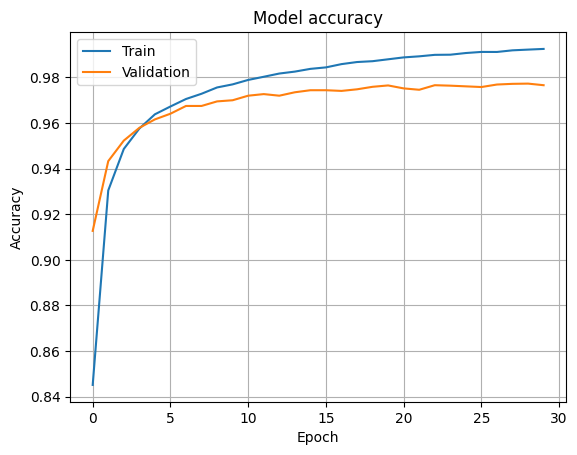

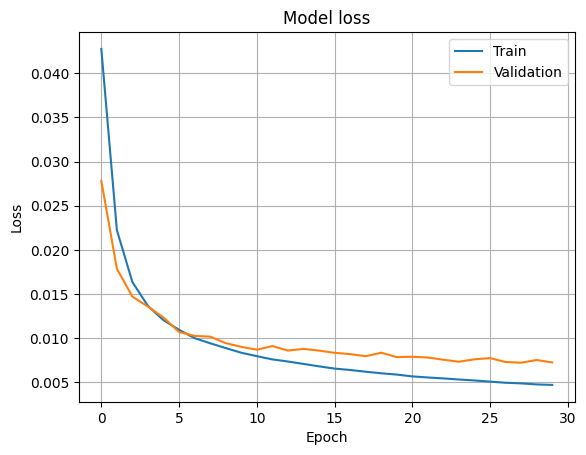

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# MNIST 읽어 와서 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784) # 텐서 모양 변환
x_test = x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0 # ndarray로 변환
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10) # 원핫 코드로 변환
y_test=tf.keras.utils.to_categorical(y_test,10)

n_input=784
n_hidden=1024
n_output=10

mlp=Sequential()
mlp.add (Dense(units=n_hidden,activation='tanh',input_shape=(n_input,),kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_output,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))

mlp.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
hist=mlp.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

res=mlp.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)
import matplotlib.pyplot as plt

# 정확률 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.grid()
plt.show()

# 손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper right')
plt.grid()
plt.show()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
469/469 - 16s - 34ms/step - accuracy: 0.0999 - loss: 0.1326 - val_accuracy: 0.1012 - val_loss: 0.1179
Epoch 2/30
469/469 - 2s - 3ms/step - accuracy: 0.8095 - loss: 0.0365 - val_accuracy: 0.8401 - val_loss: 0.0296
Epoch 3/30
469/469 - 2s - 5ms/step - accuracy: 0.8581 - loss: 0.0274 - val_accuracy: 0.8484 - val_loss: 0.0287
Epoch 4/30
469/469 - 3s - 6ms/step - accuracy: 0.8679 - loss: 0.0251 - val_accuracy: 0.8574 - val_loss: 0.0245
Epoch 5/30
469/469 - 2s - 4ms/step - accuracy: 0.8753 - loss: 0.0237 - val_accuracy: 0.8583 - val_loss: 0.0270
Epoch 6/30
469/469 - 3s - 7ms/step - accuracy: 0.8806 - loss: 0.0227 - val_accuracy: 0.8635 - val_loss: 0.0253
Epoch 7/30
469/469 - 5s - 10ms/step - accuracy: 0.8857 - loss: 0.0216 - val_accuracy: 0.8687 - val_loss: 0.0220
Epoch 8/30
469/469 - 2s - 5ms/step - accuracy: 0.8890 - loss: 0.0208 - val_accuracy: 0.8686 - val_loss: 0.0222
Epoch 9/30
469/469 - 2s - 5ms/step - accuracy: 0.8935 - loss: 0.0203 - val_accuracy: 0.8732 - val_loss: 0.023

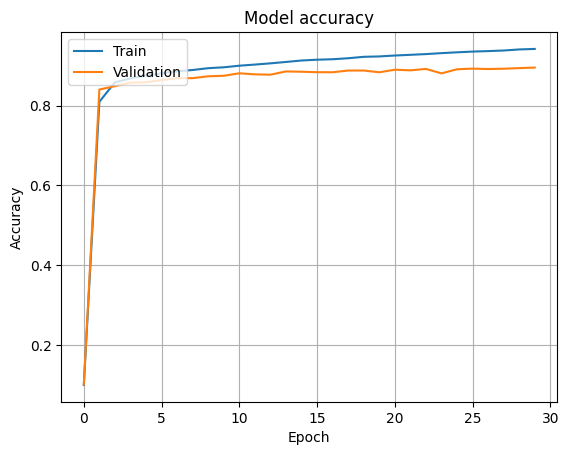

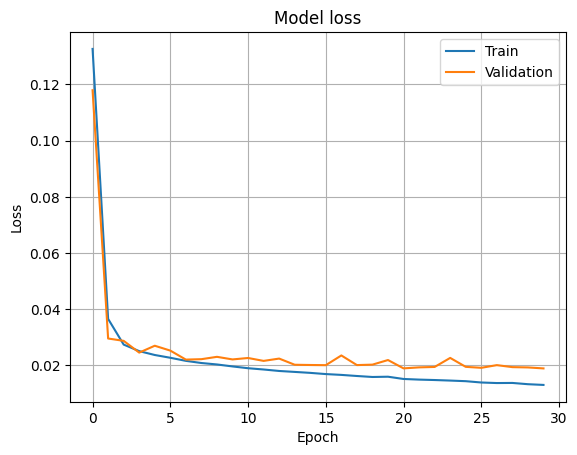

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# fashion MNIST 데이터셋을 읽어와 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(60000,784) # 텐서 모양 변환
x_test = x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0 # ndarray로 변환
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10) # 원핫 코드로 변환
y_test=tf.keras.utils.to_categorical(y_test,10)

n_input=784
n_hidden=1024
n_output=10

mlp=Sequential()
mlp.add (Dense(units=n_hidden,activation='tanh',input_shape=(n_input,),kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_output,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))

mlp.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
hist=mlp.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

res=mlp.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)
import matplotlib.pyplot as plt

# 정확률 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.grid()
plt.show()

# 손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper right')
plt.grid()
plt.show()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/30
469/469 - 6s - 12ms/step - accuracy: 0.8932 - loss: 0.0266 - val_accuracy: 0.9426 - val_loss: 0.0127
Epoch 2/30
469/469 - 1s - 2ms/step - accuracy: 0.9551 - loss: 0.0099 - val_accuracy: 0.9639 - val_loss: 0.0074
Epoch 3/30
469/469 - 1s - 3ms/step - accuracy: 0.9693 - loss: 0.0066 - val_accuracy: 0.9713 - val_loss: 0.0059
Epoch 4/30
469/469 - 1s - 3ms/step - accuracy: 0.9764 - loss: 0.0051 - val_accuracy: 0.9722 - val_loss: 0.0055
Epoch 5/30
469/469 - 1s - 3ms/step - accuracy: 0.9809 - loss: 0.0042 - val_accuracy: 0.9715 - val_loss: 0.0056
Epoch 6/30
469/469 - 1s - 2ms/step - accuracy: 0.9830 - loss: 0.0037 - val_accuracy: 0.9738 - val_loss: 0.0049
Epoch 7/30
469/469 - 1s - 2ms/step - accuracy: 0.9851 - loss: 0.0032 - val_accuracy: 0.9751 - val_loss: 0.0047
Epoch 8/30
469/469 - 1s - 3ms/step - accuracy: 0.9869 - loss: 0.0028 - val_accuracy: 0.9743 - val_loss: 0.0050
Epoch 9/30
469/469 - 2s - 5ms/step - accuracy: 0.9882 - loss

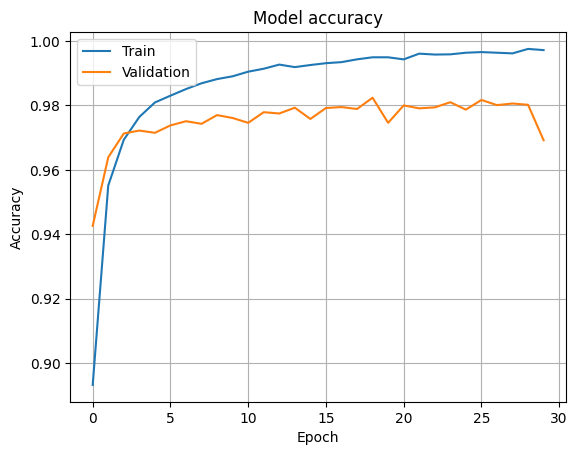

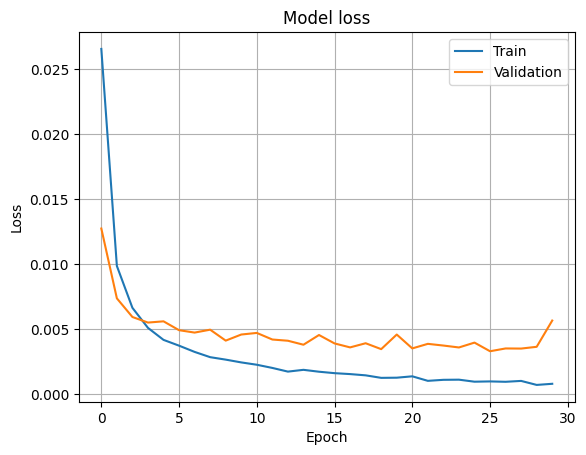

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# MNIST 읽어 와서 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784) # 텐서 모양 변환
x_test = x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0 # ndarray로 변환
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10) # 원핫 코드로 변환
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 구조 설정
n_input=784
n_hidden1=1024
n_hidden2=512
n_hidden3=512
n_hidden4=512
n_output=10

# 신경망 구조 설계
mlp=Sequential()
mlp.add(Dense(units=n_hidden1,activation='tanh',input_shape=(n_input,),kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_hidden2,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_hidden3,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_hidden4,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_output,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))

# 신경망 학습
mlp.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
hist=mlp.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

# 신경망의 정확률 측정
res=mlp.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

import matplotlib.pyplot as plt

# 정확률 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.grid()
plt.show()

# 손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper right')
plt.grid()
plt.show()

Epoch 1/30
469/469 - 7s - 16ms/step - accuracy: 0.8927 - loss: 0.0163 - val_accuracy: 0.9269 - val_loss: 0.0111
Epoch 2/30
469/469 - 3s - 6ms/step - accuracy: 0.9371 - loss: 0.0097 - val_accuracy: 0.9461 - val_loss: 0.0083
Epoch 3/30
469/469 - 1s - 2ms/step - accuracy: 0.9524 - loss: 0.0075 - val_accuracy: 0.9550 - val_loss: 0.0069
Epoch 4/30
469/469 - 1s - 2ms/step - accuracy: 0.9617 - loss: 0.0061 - val_accuracy: 0.9609 - val_loss: 0.0061
Epoch 5/30
469/469 - 1s - 2ms/step - accuracy: 0.9687 - loss: 0.0050 - val_accuracy: 0.9636 - val_loss: 0.0056
Epoch 6/30
469/469 - 1s - 3ms/step - accuracy: 0.9737 - loss: 0.0043 - val_accuracy: 0.9690 - val_loss: 0.0049
Epoch 7/30
469/469 - 2s - 5ms/step - accuracy: 0.9776 - loss: 0.0037 - val_accuracy: 0.9707 - val_loss: 0.0043
Epoch 8/30
469/469 - 1s - 2ms/step - accuracy: 0.9805 - loss: 0.0032 - val_accuracy: 0.9733 - val_loss: 0.0041
Epoch 9/30
469/469 - 1s - 3ms/step - accuracy: 0.9838 - loss: 0.0028 - val_accuracy: 0.9757 - val_loss: 0.0038


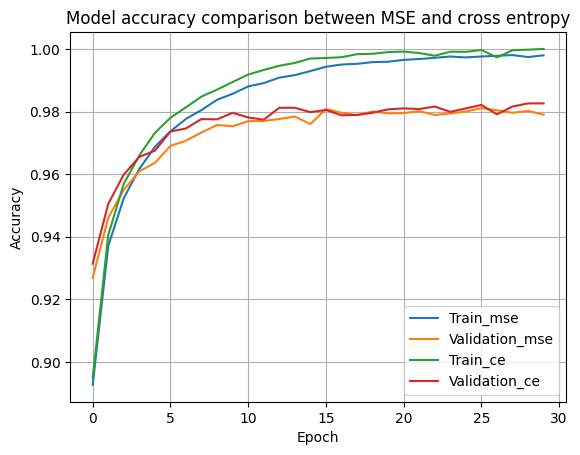

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# MNIST 읽어 와서 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 구조 설정
n_input=784
n_hidden1=1024
n_hidden2=512
n_hidden3=512
n_hidden4=512
n_output=10

# 평균제곱오차를 사용한 모델
dmlp_mse=Sequential()
dmlp_mse.add(Dense(units=n_hidden1,activation='tanh',input_shape=(n_input,)))
dmlp_mse.add(Dense(units=n_hidden2,activation='tanh'))
dmlp_mse.add(Dense(units=n_hidden3,activation='tanh'))
dmlp_mse.add(Dense(units=n_hidden4,activation='tanh'))
dmlp_mse.add(Dense(units=n_output,activation='softmax'))
dmlp_mse.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])
hist_mse=dmlp_mse.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

# 교차 엔트로피를 사용한 모델
dmlp_ce=Sequential()
dmlp_ce.add(Dense(units=n_hidden1,activation='tanh',input_shape=(n_input,)))
dmlp_ce.add(Dense(units=n_hidden2,activation='tanh'))
dmlp_ce.add(Dense(units=n_hidden3,activation='tanh'))
dmlp_ce.add(Dense(units=n_hidden4,activation='tanh'))
dmlp_ce.add (Dense(units=n_output,activation='softmax'))
dmlp_ce.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])
hist_ce=dmlp_ce.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

# 두 모델의 정확률 비교
res_mse=dmlp_mse.evaluate(x_test,y_test,verbose=0)
print("평균제곱오차의 정확률은",res_mse[1]*100)
res_ce=dmlp_ce.evaluate(x_test,y_test,verbose=0)
print("교차 엔트로피의 정확률은",res_ce[1]*100)

# 하나의 그래프에서 두 모델을 비교
import matplotlib.pyplot as plt
plt.plot(hist_mse.history['accuracy'])
plt.plot(hist_mse.history['val_accuracy'])
plt.plot(hist_ce.history['accuracy'])
plt.plot(hist_ce.history['val_accuracy'])
plt.title('Model accuracy comparison between MSE and cross entropy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train_mse','Validation_mse','Train_ce','Validation_ce'], loc='best')
plt.grid()
plt.show()

Epoch 1/50
235/235 - 3s - 14ms/step - accuracy: 0.6156 - loss: 1.3547 - val_accuracy: 0.6889 - val_loss: 0.8684
Epoch 2/50
235/235 - 1s - 3ms/step - accuracy: 0.7628 - loss: 0.7173 - val_accuracy: 0.7862 - val_loss: 0.6586
Epoch 3/50
235/235 - 1s - 5ms/step - accuracy: 0.7995 - loss: 0.5974 - val_accuracy: 0.7600 - val_loss: 0.6546
Epoch 4/50
235/235 - 1s - 5ms/step - accuracy: 0.8127 - loss: 0.5441 - val_accuracy: 0.8103 - val_loss: 0.5428
Epoch 5/50
235/235 - 1s - 2ms/step - accuracy: 0.8217 - loss: 0.5098 - val_accuracy: 0.8139 - val_loss: 0.5285
Epoch 6/50
235/235 - 1s - 2ms/step - accuracy: 0.8319 - loss: 0.4827 - val_accuracy: 0.7857 - val_loss: 0.5939
Epoch 7/50
235/235 - 1s - 2ms/step - accuracy: 0.8371 - loss: 0.4647 - val_accuracy: 0.8271 - val_loss: 0.4907
Epoch 8/50
235/235 - 1s - 3ms/step - accuracy: 0.8425 - loss: 0.4499 - val_accuracy: 0.8276 - val_loss: 0.4864
Epoch 9/50
235/235 - 1s - 6ms/step - accuracy: 0.8454 - loss: 0.4373 - val_accuracy: 0.8286 - val_loss: 0.4713


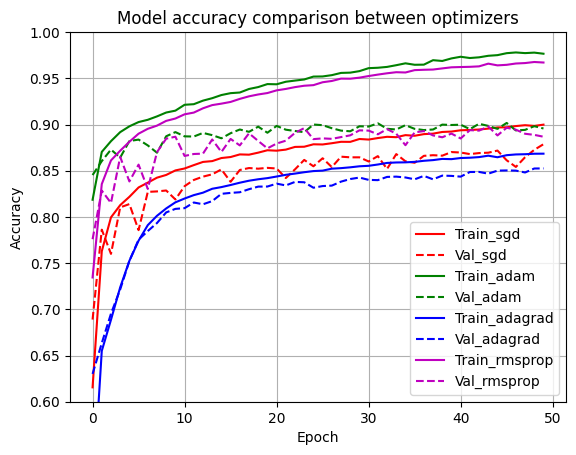

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD,Adam,Adagrad,RMSprop

# fashion MNIST 읽어 와서 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 구조 설정
n_input=784
n_hidden1=1024
n_hidden2=512
n_hidden3=512
n_hidden4=512
n_output=10

# 하이퍼 매개변수 설정
batch_siz=256
n_epoch=50

# 모델을 설계해주는 함수(모델을 나타내는 객체 model을 반환)
def build_model():
    model=Sequential()
    model.add(Dense(units=n_hidden1,activation='relu',input_shape=(n_input,)))
    model.add(Dense(units=n_hidden2,activation='relu'))
    model.add(Dense(units=n_hidden3,activation='relu'))
    model.add(Dense(units=n_hidden4,activation='relu'))
    model.add(Dense(units=n_output,activation='softmax'))
    return model

# SGD 옵티마이저를 사용하는 모델
dmlp_sgd=build_model()
dmlp_sgd.compile(loss='categorical_crossentropy',optimizer=SGD(),metrics=['accuracy'])
hist_sgd=dmlp_sgd.fit(x_train,y_train,batch_size=batch_siz,epochs=n_epoch,validation_data=(x_test,y_test),verbose=2)

# Adam 옵티마이저를 사용하는 모델
dmlp_adam=build_model()
dmlp_adam.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist_adam=dmlp_adam.fit(x_train,y_train,batch_size=batch_siz,epochs=n_epoch,validation_data=(x_test,y_test),verbose=2)

# Adagrad 옵티마이저를 사용하는 모델
dmlp_adagrad=build_model()
dmlp_adagrad.compile(loss='categorical_crossentropy',optimizer=Adagrad(),metrics=['accuracy'])
hist_adagrad=dmlp_adagrad.fit(x_train,y_train,batch_size=batch_siz,epochs=n_epoch,validation_data=(x_test,y_test),verbose=2)

# RMSprop 옵티마이저를 사용하는 모델
dmlp_rmsprop=build_model()
dmlp_rmsprop.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
hist_rmsprop=dmlp_rmsprop.fit(x_train,y_train,batch_size=batch_siz,epochs=n_epoch,validation_data=(x_test,y_test),verbose=2)

# 네 모델의 정확률을 출력
print("SGD 정확률은",dmlp_sgd.evaluate(x_test,y_test,verbose=0)[1]*100)
print("Adam 정확률은",dmlp_adam.evaluate(x_test,y_test,verbose=0)[1]*100)
print("Adagrad 정확률은",dmlp_adagrad.evaluate(x_test,y_test,verbose=0)[1]*100)
print("RMSprop 정확률은",dmlp_rmsprop.evaluate(x_test,y_test,verbose=0)[1]*100)

import matplotlib.pyplot as plt

# 네 모델의 정확률을 하나의 그래프에서 비교
plt.plot(hist_sgd.history['accuracy'],'r')
plt.plot(hist_sgd.history['val_accuracy'],'r--')
plt.plot(hist_adam.history['accuracy'],'g')
plt.plot(hist_adam.history['val_accuracy'],'g--')
plt.plot(hist_adagrad.history['accuracy'],'b')
plt.plot(hist_adagrad.history['val_accuracy'],'b--')
plt.plot(hist_rmsprop.history['accuracy'],'m')
plt.plot(hist_rmsprop.history['val_accuracy'],'m--')
plt.title('Model accuracy comparison between optimizers')
plt.ylim((0.6,1.0))
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train_sgd','Val_sgd','Train_adam','Val_adam','Train_adagrad','Val_adagrad','Train_rmsprop','Val_rmsprop'], loc='best')
plt.grid()
plt.show()

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD,Adam,Adagrad,RMSprop
from sklearn.model_selection import KFold

# fashion MNIST를 읽고 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 구조 설정
n_input=784
n_hidden1=1024
n_hidden2=512
n_hidden3=512
n_hidden4=512
n_output=10

# 하이퍼 매개변수 설정
batch_siz=256
n_epoch=20
k=5 # 5-겹

# 모델을 설계해주는 함수(모델을 나타내는 객체 model을 반환)
def build_model():
    model=Sequential()
    model.add(Dense(units=n_hidden1,activation='relu',input_shape=(n_input,)))
    model.add(Dense(units=n_hidden2,activation='relu'))
    model.add(Dense(units=n_hidden3,activation='relu'))
    model.add(Dense(units=n_hidden4,activation='relu'))
    model.add(Dense(units=n_output,activation='softmax'))
    return model

# 교차 검증을 해주는 함수(서로 다른 옵티마이저(opt)에 대해)
def cross_validation(opt):
    accuracy=[]
    for train_index,val_index in KFold(k).split(x_train):
        xtrain,xval=x_train[train_index],x_train[val_index]
        ytrain,yval=y_train[train_index],y_train[val_index]
        dmlp=build_model()
        dmlp.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
        dmlp.fit(xtrain,ytrain,batch_size=batch_siz,epochs=n_epoch,verbose=0)
        accuracy.append(dmlp.evaluate(xval,yval,verbose=0)[1])
    return accuracy

# 옵티마이저 4개에 대해 교차 검증을 실행
acc_sgd=cross_validation(SGD())
acc_adam=cross_validation(Adam())
acc_adagrad=cross_validation(Adagrad())
acc_rmsprop=cross_validation(RMSprop())

# 옵티마이저 4개의 정확률을 비교
print("SGD:",np.array(acc_sgd).mean())
print("Adam:",np.array(acc_adam).mean())
print("Adagrad:",np.array(acc_adagrad).mean())
print("RMSprop:",np.array(acc_rmsprop).mean())

import matplotlib.pyplot as plt

# 네 옵티마이저의 정확률을 박스플롯으로 비교
plt.boxplot([acc_sgd,acc_adam,acc_adagrad,acc_rmsprop],labels=["SGD","Adam","Adagrad","RMSprop"])
plt.grid()

ValueError: Unknown variable: <KerasVariable shape=(784, 1024), dtype=float32, path=sequential_29/dense_139/kernel>. This optimizer can only be called for the variables it was originally built with. When working with a new set of variables, you should recreate a new optimizer instance.